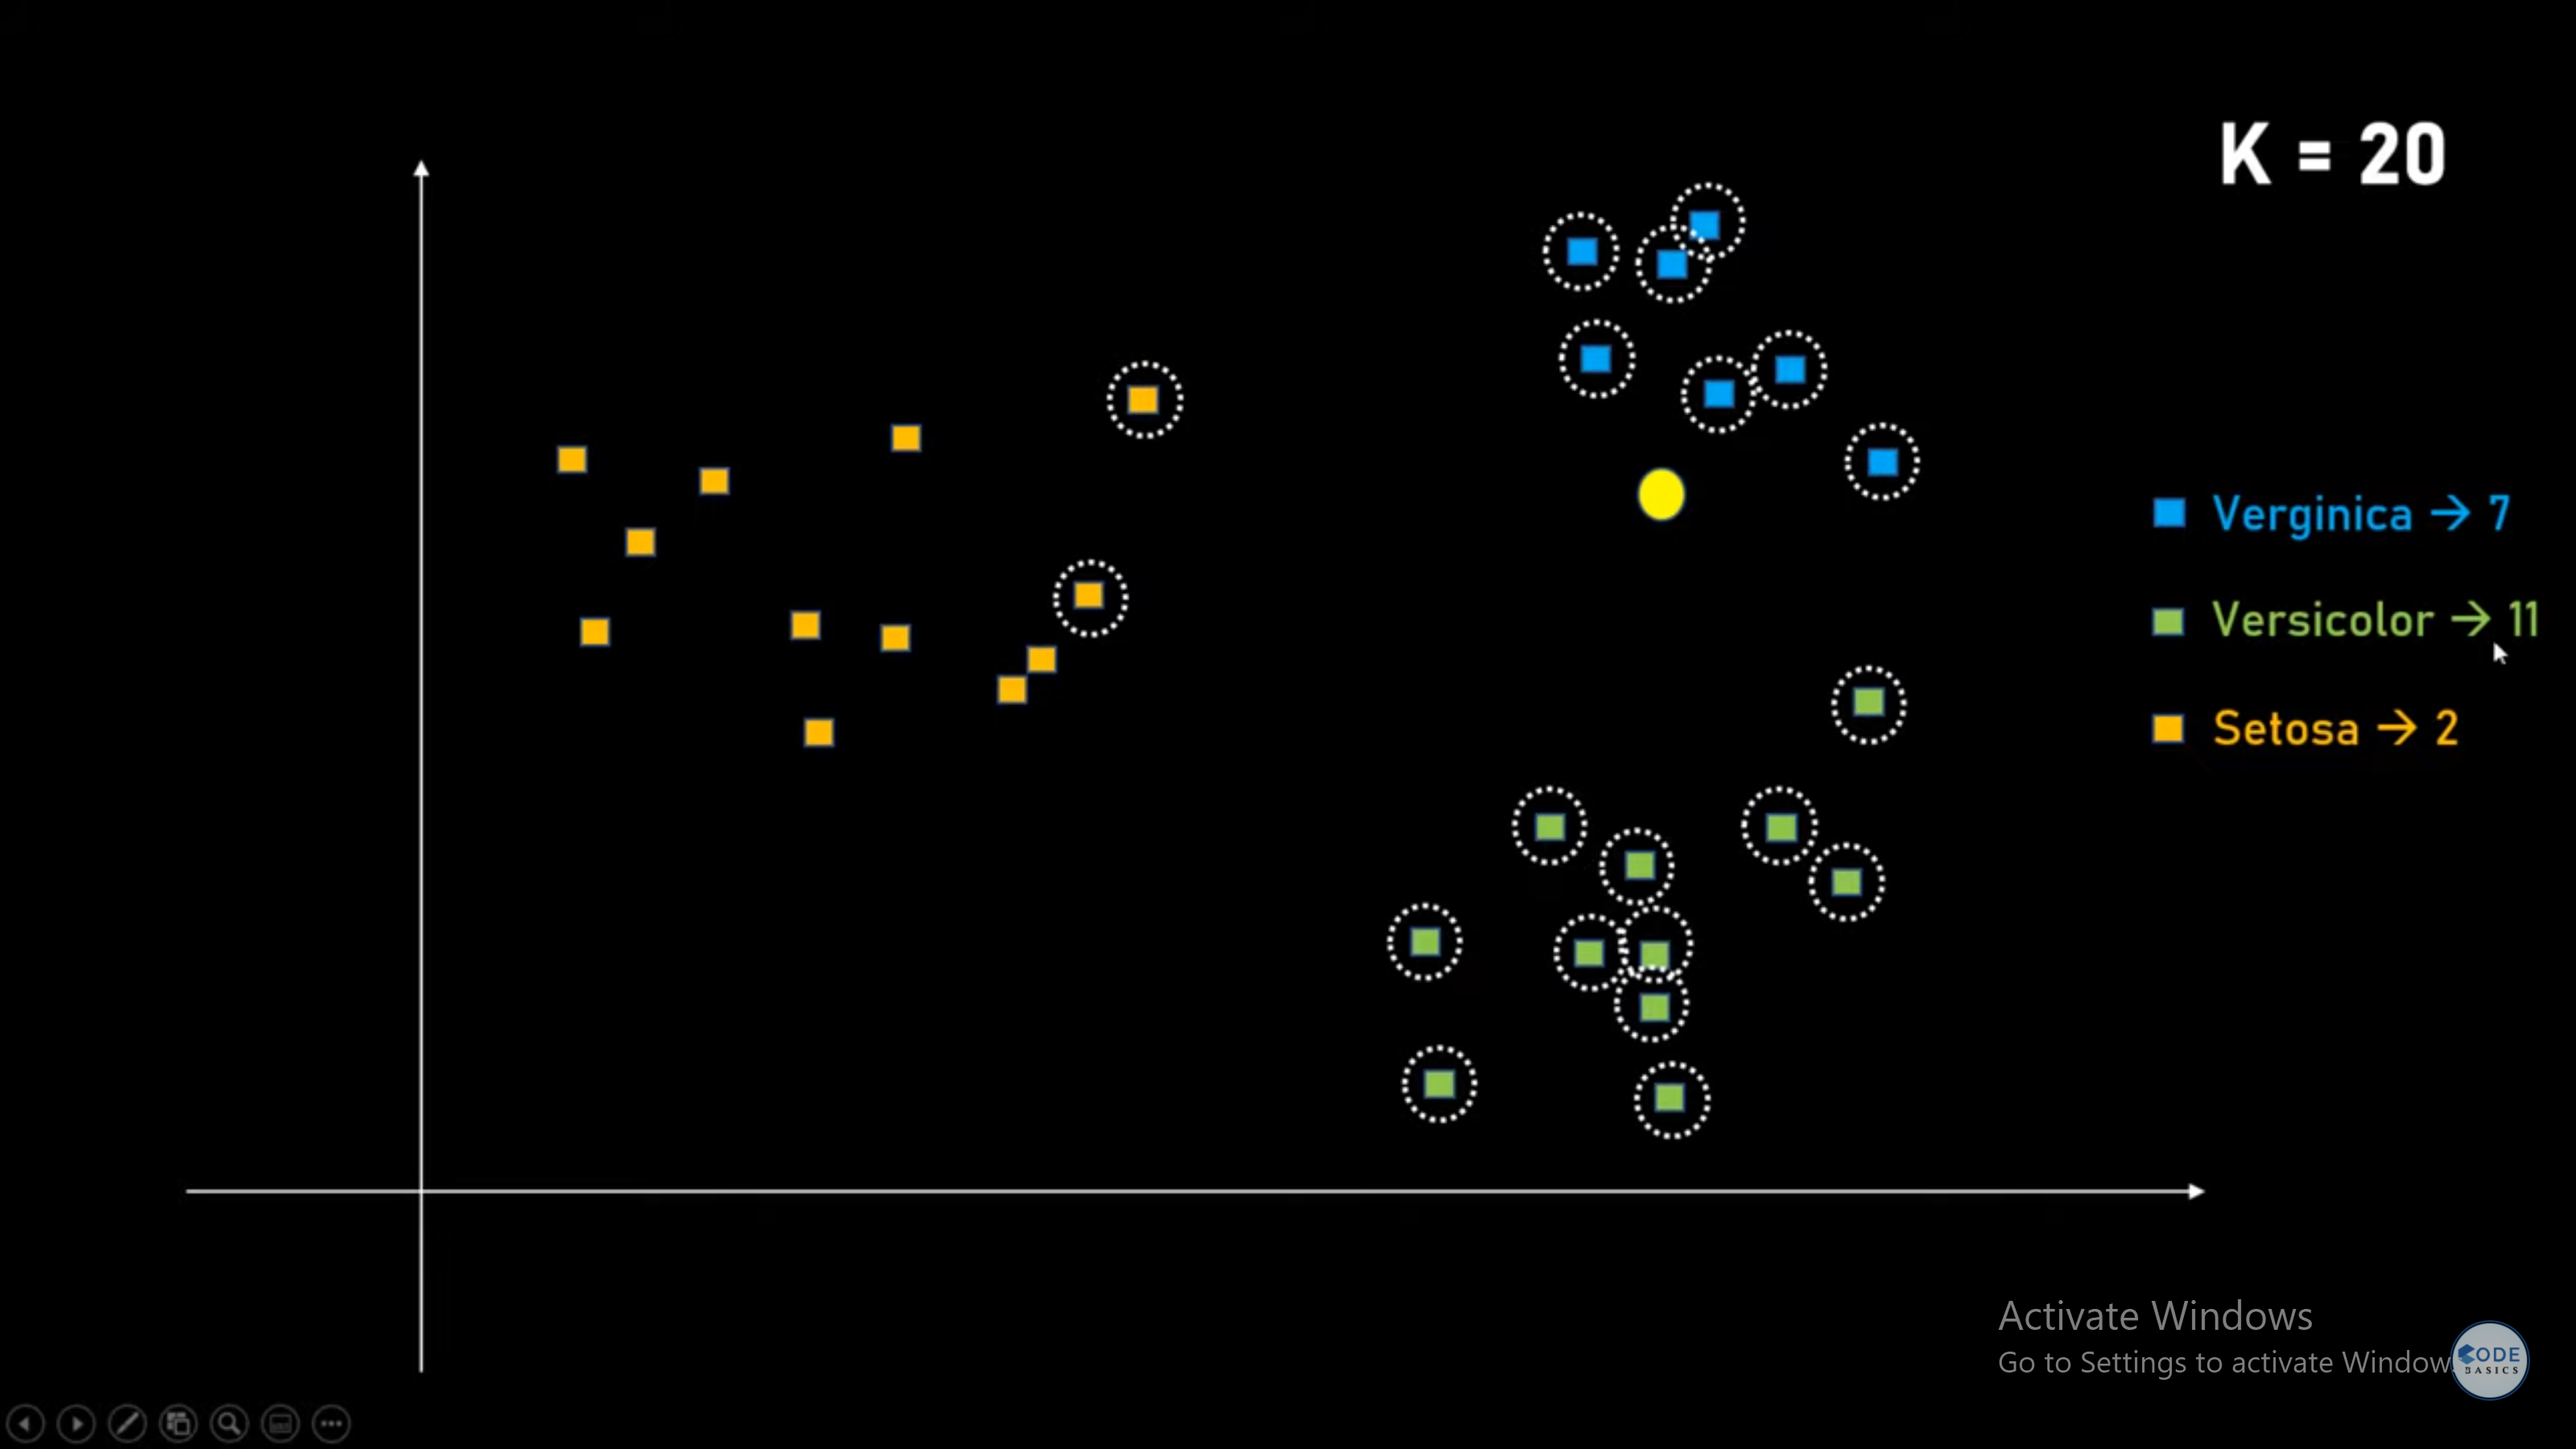



> K should be not very small or very high



## **Berikut adalah beberapa situasi di mana K-NN cocok digunakan:**

### **1. Klasifikasi Non-Linear:**
K-NN dapat digunakan untuk mengklasifikasikan data dengan distribusi yang kompleks dan non-linear, karena algoritma ini tidak membuat asumsi eksplisit tentang bentuk distribusi data.

### **2. Dataset dengan Jumlah Fitur Sedikit:**
K-NN bekerja baik ketika jumlah fitur dalam dataset relatif sedikit. Dengan fitur yang terlalu banyak, K-NN bisa mengalami "curse of dimensionality," di mana jarak antar titik menjadi lebih seragam, sehingga sulit untuk menentukan tetangga terdekat secara efektif.

### **3. Masalah dengan Pola atau Grup yang Jelas:**
K-NN sangat baik untuk masalah klasifikasi di mana data memiliki pola atau kelompok yang jelas. Misalnya, dalam pengenalan pola seperti pengenalan tulisan tangan, klasifikasi gambar, atau bahkan klasifikasi genetik.

### **4. Ketika Interpretabilitas Mudah Diperlukan:**
Karena K-NN adalah algoritma berbasis instance, prediksi yang dihasilkan sangat mudah dipahami. Kamu dapat melihat langsung tetangga mana yang mempengaruhi klasifikasi, yang dapat sangat bermanfaat dalam beberapa kasus aplikasi.

### **5. Rekomendasi Sistem:**
Dalam sistem rekomendasi, K-NN dapat digunakan untuk mencari item atau pengguna yang mirip berdasarkan fitur-fitur tertentu, dan memberikan rekomendasi berdasarkan preferensi mereka.

### **6. Pencarian dan Pengenalan Gambar:**
Dalam pengenalan gambar, K-NN dapat digunakan untuk menemukan gambar yang mirip dalam dataset berdasarkan jarak antar fitur gambar.

### **7. Anomaly Detection:**
K-NN juga dapat digunakan untuk mendeteksi anomali, di mana data yang berbeda signifikan dari tetangganya dianggap sebagai anomali.

### **8. Situasi dengan Latency yang Tidak Ketat:**
K-NN mungkin memerlukan waktu lebih lama untuk memproses data dalam kasus-kasus di mana jumlah data besar atau nilai K yang besar digunakan. Oleh karena itu, algoritma ini lebih cocok dalam situasi di mana latensi tidak terlalu kritis.

Namun, K-NN memiliki beberapa kelemahan, seperti kinerja yang lambat pada dataset besar dan sensitif terhadap skala data. Oleh karena itu, normalisasi atau standardisasi data sering diperlukan sebelum menggunakan K-NN.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df1 = df[df['target'] == 0]
df2 = df[df['target'] == 1]
df3 = df[df['target'] == 2]

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)


### **Create KNN (K Neighrest Neighbour Classifier)**

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.score(X_test, y_test)

1.0

In [13]:
# prompt: import cunfussion matrix

from sklearn.metrics import confusion_matrix


In [14]:
cm = confusion_matrix(y_test, knn.predict(X_test))
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Text(58.222222222222214, 0.5, 'Truth')

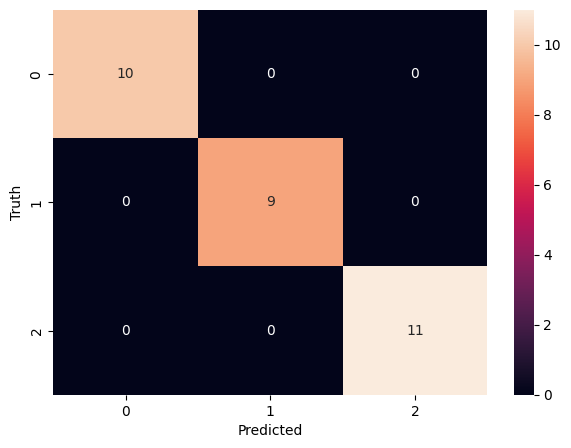

In [15]:
# prompt: visualisasikan cm

import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [16]:
# prompt: import classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## **EXERCISE**

From sklearn.datasets load digits dataset and do following

1. Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
1. Plot confusion matrix
1. Plot classification report

---

  Klasifikasikan digit (0 hingga 9) menggunakan pengklasifikasi KNN. Anda dapat menggunakan nilai yang berbeda untuk k tetangga dan perlu mencari tahu nilai K yang memberi Anda skor maksimum. Anda dapat mencoba nilai K yang berbeda secara manual atau menggunakan gridsearchcv



In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

In [19]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

9

In [24]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [22]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:

X_train,X_test,y_train,y_test = train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

KeyError: "['target'] not found in axis"

In [74]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
#0.9833333333333333

0.9833333333333333

In [75]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
#0.9805555555555555

0.9805555555555555

In [76]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
#0.9861111111111112

0.9861111111111112

In [77]:
cm = confusion_matrix(y_test,knn.predict(X_test))
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 38]])

Text(95.72222222222221, 0.5, 'Truth')

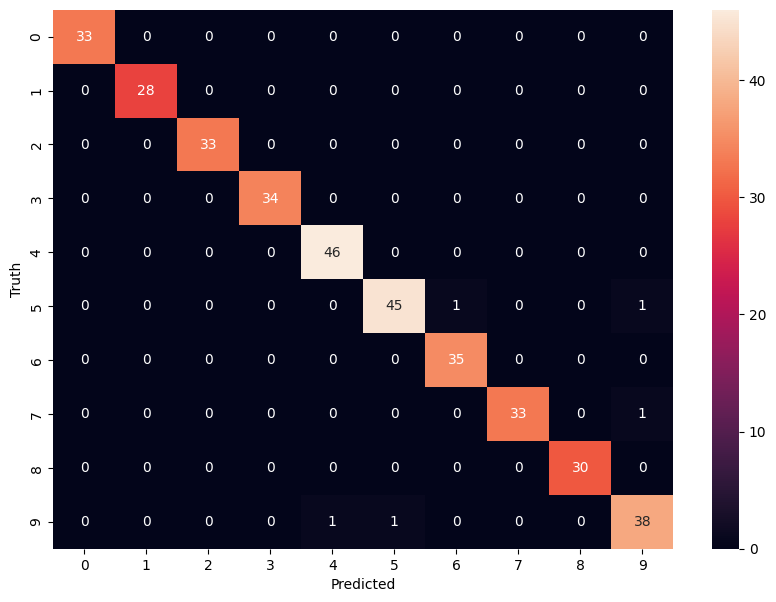

In [78]:
# prompt: visualisasikan cm

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

